In [1]:
import numpy as np
import telco_acquire
import prepare
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [2]:
train, test, validate = prepare.prep_telco()

In [3]:
# ProfileReport(train, explorative = True)

## In order to correctly classifiy a customer as a churner or not, lets look at the interaction between various variables and customers who churn

In [4]:
# lets check how many of our customers churn?
print(f'Number of customers that churn is: {train.churn.value_counts()[1]}')
print('')

print(f'Percentage of the customers that churn is: {train.churn.value_counts()[1]/len(train)*100}')

## Approximately 27 % of our customers churn

Number of customers that churn is: 1196

Percentage of the customers that churn is: 26.57777777777778


Number of customers who churn within the first year: 681


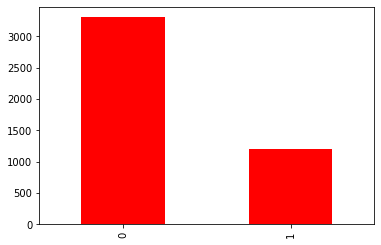

In [5]:
# lets check when they churn

print(f'Number of customers who churn within the first year: {train[train.churn == 1].tenure.value_counts().head(12).sum()}')

# out of 1196 customers 681 left within the first year

train.churn.value_counts().plot(kind = 'bar', color = 'red')
plt.show()

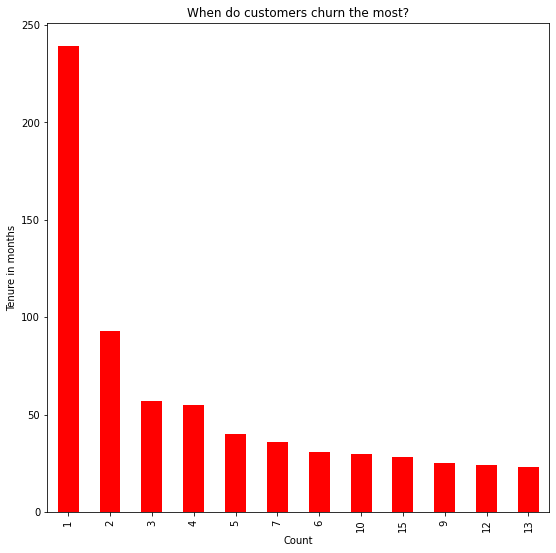

In [6]:


plt.figure(figsize= (9,9))
train[train.churn == 1].tenure.value_counts().head(12).plot(kind = 'bar', color = 'red')
plt.xlabel('Count')
plt.ylabel('Tenure in months')
plt.title('When do customers churn the most?')
plt.show()

<AxesSubplot:xlabel='churn', ylabel='Month-to-month'>

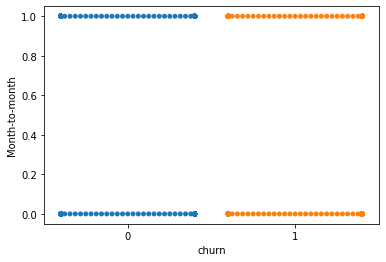

In [7]:
sns.swarmplot(train.churn,train['Month-to-month'])
# plt.label

#### We can see that majority of the customers churn within the first 12 months

### Rate of churn per month

tenure
1     0.608142
2     0.553571
3     0.452381
4     0.458333
5     0.481928
6     0.382716
7     0.409091
8     0.285714
9     0.367647
10    0.400000
11    0.333333
12    0.347826
13    0.319444
14    0.404762
15    0.405797
Name: customer_id, dtype: float64


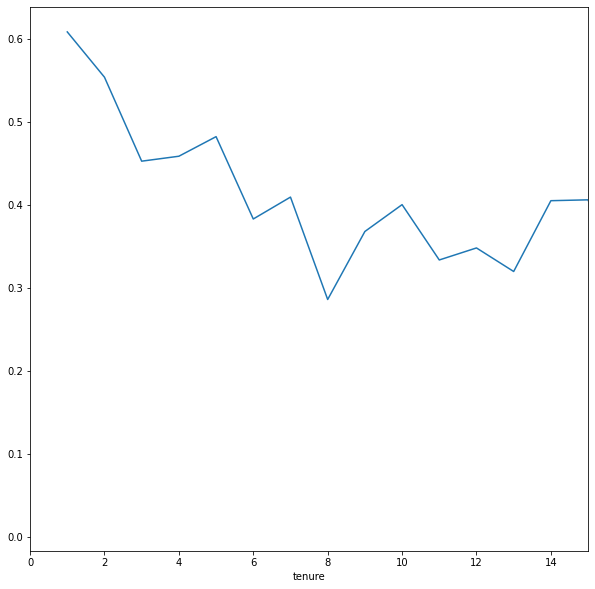

In [8]:
### Lets look at the churn rate per tenure month. 
#### Represents how many of the customers churn per month vs how many customers we get


churn_rate = pd.Series(train[train['churn']==1].groupby('tenure').customer_id.count())/(train.groupby('tenure').customer_id.count())
print(churn_rate.head(15))
plt.figure(figsize = (10,10))
plt.xlim(0,15)
churn_rate.plot()
plt.show()

### So why do customers churn at such a hight rate within few months of being a customre with telco?

#### Lets see how much on average they paid monthly?

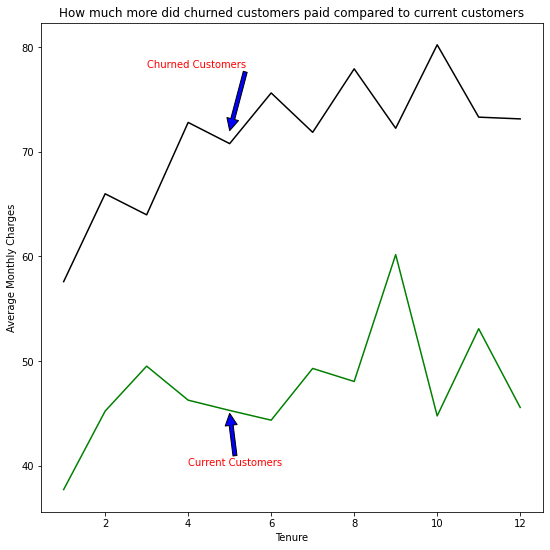

In [9]:
plt.figure(figsize= (9,9))
train[train.churn == 1].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'black')
train[train.churn == 0].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'green')
plt.xlabel('Tenure')
plt.ylabel('Average Monthly Charges')
plt.title("How much more did churned customers paid compared to current customers")

plt.annotate('Churned Customers', xy = (5, 72), xytext=(3, 78),arrowprops={'facecolor': 'blue'}, color = 'red')

plt.annotate('Current Customers', xy = (5, 45), xytext=(4, 40),arrowprops={'facecolor': 'blue'}, color = 'red')

plt.show()


## Takeaway:
   ### We can see that current customers pay relatively low compared to what churned customers did

### Is there a reason why churned customers were paying more ? Let's take a look

In [10]:
first_year = train[train.tenure <= 12]
first_year.churn.value_counts()

0    727
1    668
Name: churn, dtype: int64

tenure  Fiber optic
1       1              126
2       1               58
3       1               34
4       1               40
5       1               25
6       1               22
7       1               26
8       1               16
9       1               16
10      1               24
11      1               13
12      1               15
Name: Fiber optic, dtype: int64


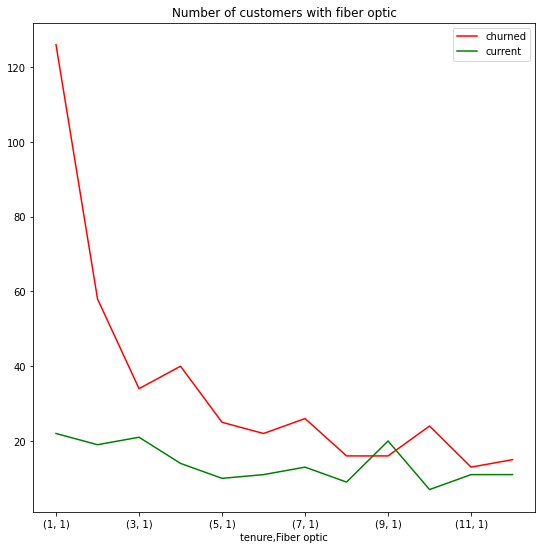

In [11]:
# we know that a vast amount of customers leave within first year, but a huge chunk leave after 1st month. Does fiber
# optic line play a role in it?

print(first_year[(first_year.churn == 1) & (first_year['Fiber optic']==1)].groupby('tenure')['Fiber optic'].value_counts())

plt.figure(figsize = (9,9))

first_year[(first_year.churn == 1) & (first_year['Fiber optic']==1)].groupby('tenure')['Fiber optic'].value_counts().plot(color = 'red', label = 'churned')

first_year[(first_year.churn == 0) & (first_year['Fiber optic']==1)].groupby('tenure')['Fiber optic'].value_counts().plot(color = 'green', label = 'current')

plt.legend()

plt.title('Number of customers with fiber optic')

plt.show()

## We can see that more than half of the customers with fiber optic leave our company after a month 
## and that number continues to decline


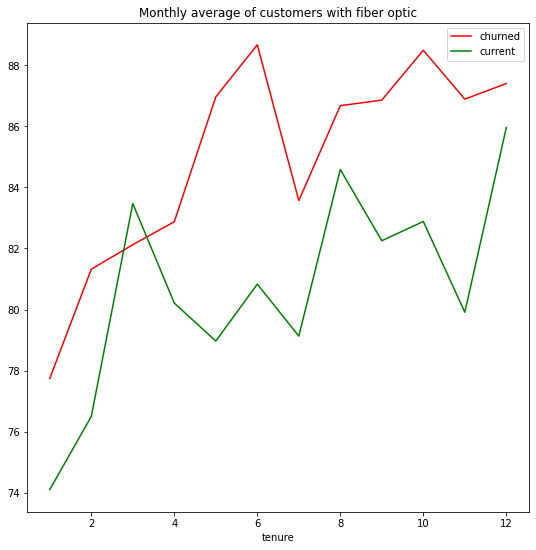

In [12]:
plt.figure(figsize = (9,9))

first_year[(first_year.churn == 1) & (first_year['Month-to-month']==1)& (first_year['Fiber optic']==1)].groupby('tenure')['monthly_charges'].mean().plot(color = 'red', label = 'churned')


first_year[(first_year.churn == 0) & (first_year['Month-to-month']==1)& (first_year['Fiber optic']==1)].groupby('tenure')['monthly_charges'].mean().plot(color = 'green', label = 'current')



## Month to month churned customers with fiber optic paid relatively more than the current customers in month to month 
## and with fiber optic

plt.title("Monthly average of customers with fiber optic")
plt.legend()
plt.show()

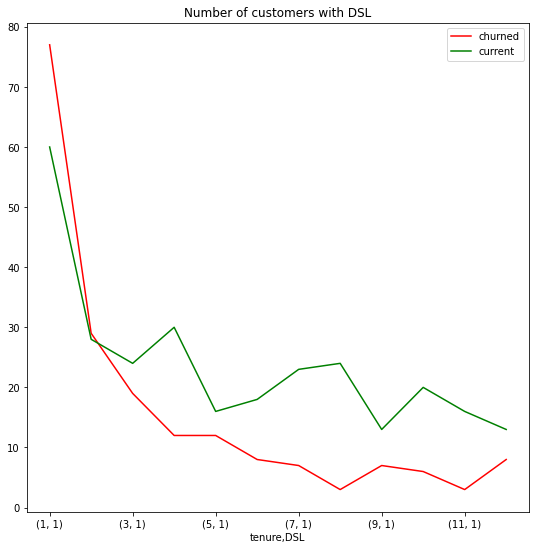

In [13]:
plt.figure(figsize = (9,9))

first_year[(first_year.churn == 1) & (first_year['DSL']==1)].groupby('tenure')['DSL'].value_counts().plot(color = 'red', label = 'churned')

first_year[(first_year.churn == 0) & (first_year['DSL']==1)].groupby('tenure')['DSL'].value_counts().plot(color = 'green', label = 'current')

plt.legend()

plt.title('Number of customers with DSL')

plt.show()


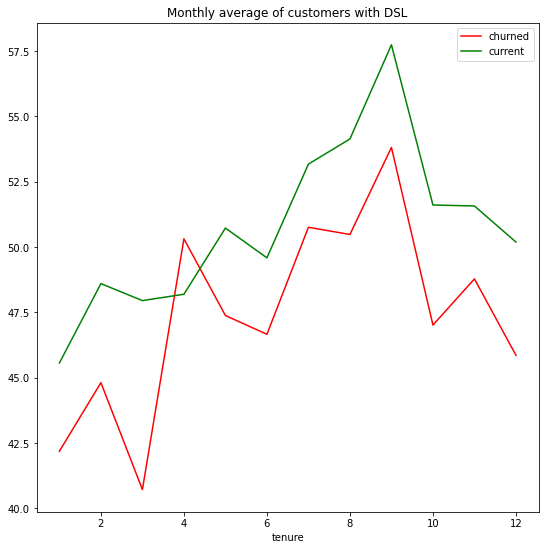

In [14]:
plt.figure(figsize = (9,9))

first_year[(first_year.churn == 1) & (first_year['Month-to-month']==1)& (first_year['DSL']==1)].groupby('tenure')['monthly_charges'].mean().plot(color = 'red', label = 'churned')


first_year[(first_year.churn == 0) & (first_year['Month-to-month']==1)& (first_year['DSL']==1)].groupby('tenure')['monthly_charges'].mean().plot(color = 'green', label = 'current')



## Month to month churned customers with fiber optic paid relatively more than the current customers in month to month 
## and with fiber optic

plt.title("Monthly average of customers with DSL")
plt.legend()
plt.show()

<AxesSubplot:xlabel='tenure'>

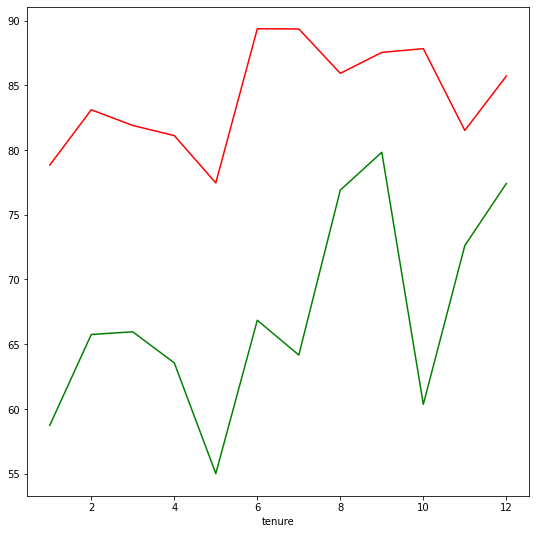

In [15]:
plt.figure(figsize = (9,9))

first_year[(first_year.churn == 1) & (first_year['Month-to-month']==1)& (first_year['phone_and_multiple_lines']==1)].groupby('tenure')['monthly_charges'].mean().plot(color = 'red', label = 'churned')


first_year[(first_year.churn == 0) & (first_year['Month-to-month']==1)& (first_year['phone_and_multiple_lines']==1)].groupby('tenure')['monthly_charges'].mean().plot(color = 'green', label = 'current')



In [16]:
first_year.groupby('partner_dependents').churn.value_counts()

partner_dependents  churn
0                   0        613
                    1        606
1                   0        114
                    1         62
Name: churn, dtype: int64

More of the current customers have DSL compared to churned customers


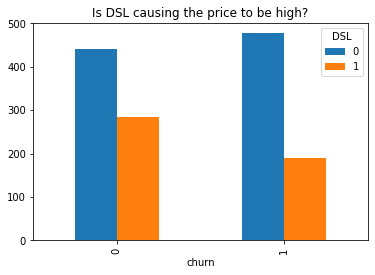

In [17]:
pd.crosstab(first_year.churn, first_year.DSL).plot(kind = 'bar')
plt.title('Is DSL causing the price to be high?')
print('More of the current customers have DSL compared to churned customers')

More of the churned customers have Fiber optic compared to churned customers


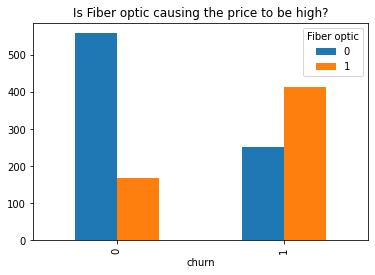

In [18]:
pd.crosstab(first_year.churn, first_year['Fiber optic']).plot(kind = 'bar')
plt.title('Is Fiber optic causing the price to be high?')
print('More of the churned customers have Fiber optic compared to churned customers')


### Takeaway:
    ## the fiber optic might be causing the monthly charge to be higher for churned customers than current customers

Maybe


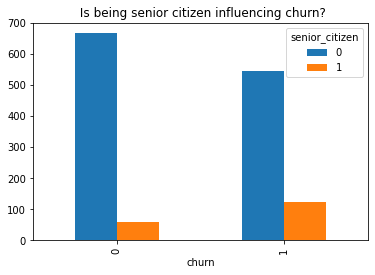

In [19]:
pd.crosstab(first_year.churn, first_year.senior_citizen).plot(kind = 'bar')
plt.title(' Is being senior citizen influencing churn?')
print('Maybe')

 Maybe


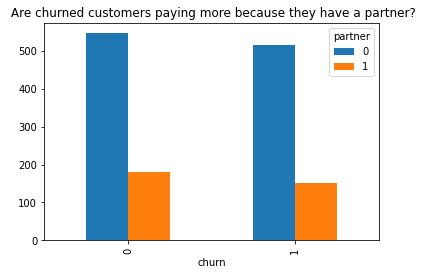

In [20]:
pd.crosstab(first_year.churn, first_year.partner).plot(kind = 'bar')
plt.title(' Are churned customers paying more because they have a partner?')
print(' Maybe')

 Not Really


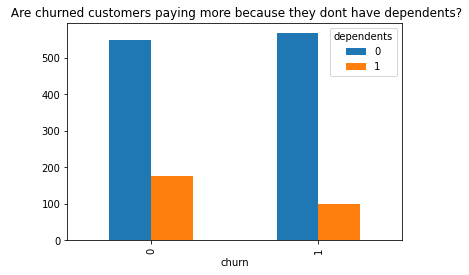

In [21]:
pd.crosstab(first_year.churn, first_year.dependents).plot(kind = 'bar')
plt.title(' Are churned customers paying more because they dont have dependents?')
print(' Not Really')

Not Really


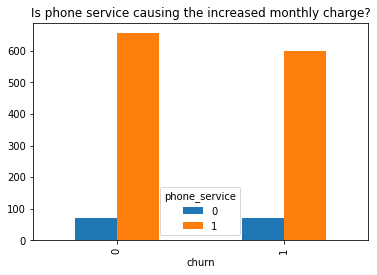

In [22]:
pd.crosstab(first_year.churn, first_year.phone_service).plot(kind = 'bar')
plt.title('Is phone service causing the increased monthly charge?')
print('Not Really')

It might because more churned customers have multiple lines


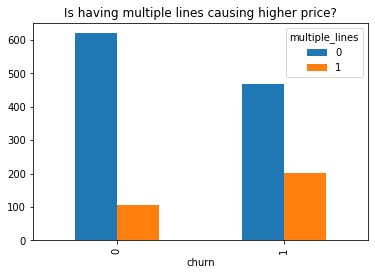

In [23]:
pd.crosstab(first_year.churn, first_year.multiple_lines).plot(kind = 'bar')
plt.title('Is having multiple lines causing higher price?')
print('It might because more churned customers have multiple lines')

Not so significant


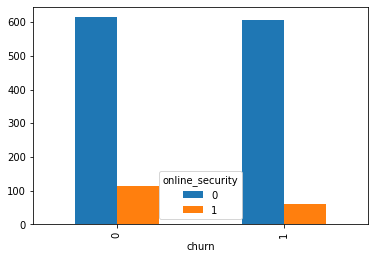

In [24]:
pd.crosstab(first_year.churn, first_year.online_security).plot(kind = 'bar')

print('Not so significant')

Not so much influence


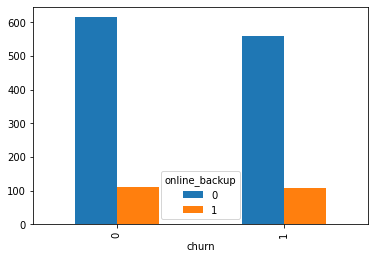

In [25]:
pd.crosstab(first_year.churn, first_year.online_backup).plot(kind = 'bar')
print('Not so much influence')

Not so much


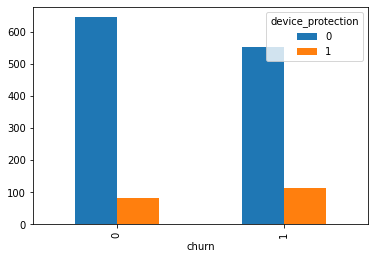

In [26]:
pd.crosstab(first_year.churn, first_year.device_protection).plot(kind = 'bar')
print('Not so much')

Not so much influence


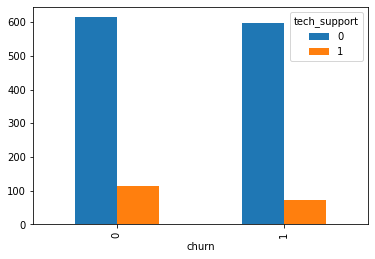

In [27]:
pd.crosstab(first_year.churn, first_year.tech_support).plot(kind = 'bar')
print('Not so much influence')

Maybe


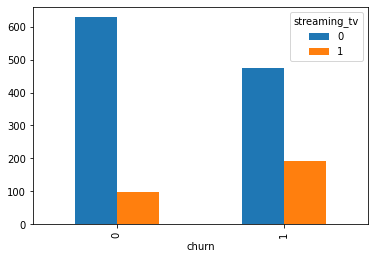

In [28]:
pd.crosstab(first_year.churn, first_year.streaming_tv).plot(kind = 'bar')
print('Maybe')

Maybe


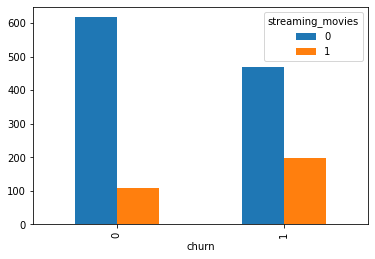

In [29]:
pd.crosstab(first_year.churn, first_year.streaming_movies).plot(kind = 'bar')
print('Maybe')

Maybe


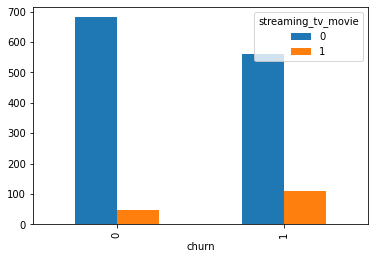

In [30]:
pd.crosstab(first_year.churn, first_year.streaming_tv_movie).plot(kind = 'bar')
print('Maybe')

A lot more of churned customers signed up for paperless billing


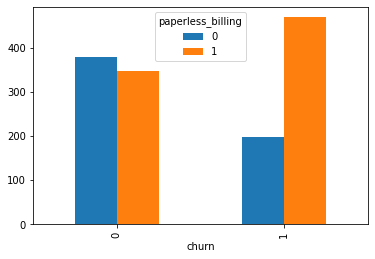

In [31]:
pd.crosstab(first_year.churn, first_year.paperless_billing).plot(kind = 'bar')

print('A lot more of churned customers signed up for paperless billing')

Not so much


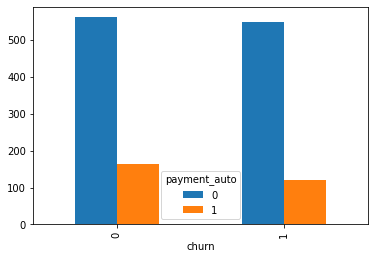

In [32]:
pd.crosstab(first_year.churn, first_year.payment_auto).plot(kind = 'bar')

print('Not so much')

Both churned and non churned customers have high month to month customers

But why the high monthly average?


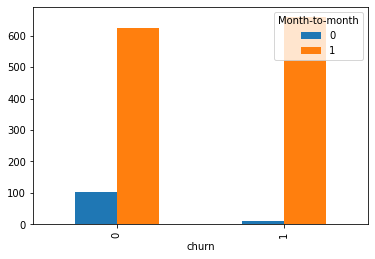

In [33]:
pd.crosstab(first_year.churn, first_year['Month-to-month']).plot(kind = 'bar')

print('Both churned and non churned customers have high month to month customers')
print('')
print('But why the high monthly average?')

<AxesSubplot:xlabel='churn'>

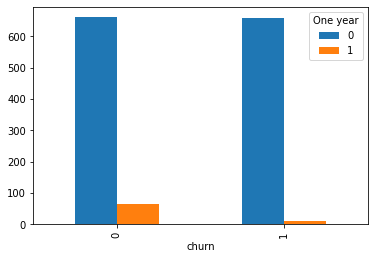

In [34]:
pd.crosstab(first_year.churn, first_year['One year']).plot(kind = 'bar')

<AxesSubplot:xlabel='churn'>

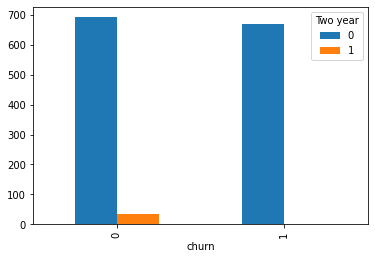

In [35]:
pd.crosstab(first_year.churn, first_year['Two year']).plot(kind = 'bar')

### Takeaway:
    ### Customers with one or two year contract are almost unlikely to churn

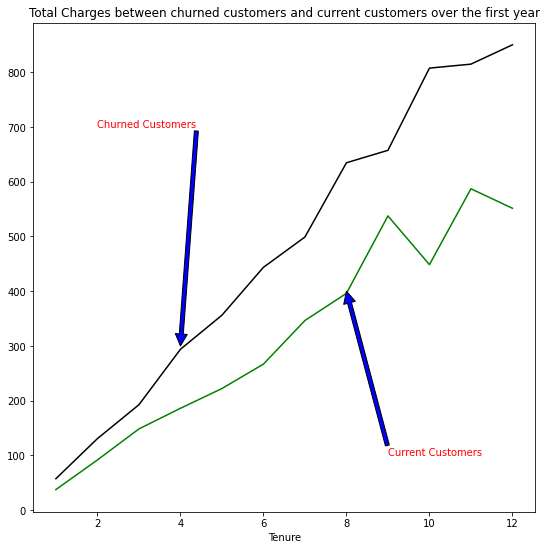

In [36]:
# total charges between churned and current customers over the first year

plt.figure(figsize= (9,9))
first_year[first_year.churn == 1].groupby('tenure').total_charges.mean().plot(color = 'black')
first_year[first_year.churn == 0].groupby('tenure').total_charges.mean().plot(color = 'green')
plt.title('Total Charges between churned customers and current customers over the first year')
plt.xlabel('Tenure')

plt.annotate('Churned Customers', xy = (4, 300), xytext=(2, 700),arrowprops={'facecolor': 'blue'}, color = 'red')

plt.annotate('Current Customers', xy = (8, 400), xytext=(9, 100),arrowprops={'facecolor': 'blue'}, color = 'red')
plt.show()

### Hypothesis1:
### Month to Month customers churn more

### Hypothesis 2:
### Customers who churned pay more on monthly charge

### lets check hypothesis 1

$H_0$: The contract type has no influence on churn rate

$H_a$: Month to month customers churn more




In [37]:
from scipy import stats

In [38]:
# Since we are comparing two categorical variables,  so we will need to perform Chi^2 test

a = 0.05 # Setting our significance level
observed_data = pd.crosstab(train.churn, train['Month-to-month'])

In [39]:
chi2, p, degf, expected = stats.chi2_contingency(observed_data)

In [40]:
chi2, p, degf, expected 

(747.9632623890424,
 1.1124037874492999e-164,
 1,
 array([[1491.20533333, 1812.79466667],
        [ 539.79466667,  656.20533333]]))

In [41]:
if p<a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### lets check hypothesis 2

$H_0$: $\mu$ Monthly charge for churn customers = $\mu$ Monthly charge for current customers

$H_a$: $\mu$ Monthly charge for churn customers > $\mu$ Monthly charge for current customers

In [94]:
# its a two sample one tailed t test
a = 0.05 # setting our significance level

<AxesSubplot:xlabel='monthly_charges'>

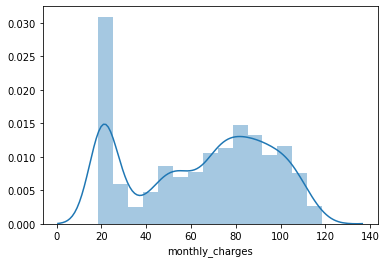

In [78]:
sns.distplot(train.monthly_charges)

In [79]:
x1 = train[train.churn == 1].monthly_charges
x2 = train[train.churn == 0].monthly_charges

In [80]:
x1.var()

611.0760250976051

In [81]:
x2.var()

975.1498219820324

#### Assumptions:
    - Monthly charge is normally distributed
    - We have large enough sample
    - Variance is not equal
    

In [88]:
t, p1 = stats.ttest_ind(x1, x2, equal_var = False)
t,p1

(14.552441022766798, 3.2374322293830077e-46)

In [92]:
if p1/2 < a:
    print('We reject the null hypothesis')
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# Lets go on to model building

In [96]:
train.shape, test.shape, validate.shape

((4500, 29), (1407, 29), (1125, 29))

In [97]:
train.columns

Index(['customer_id', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'partner_dependents', 'phone_and_multiple_lines', 'streaming_tv_movie',
       'online_security_and_backup', 'payment_auto', 'payment_not_auto',
       'Month-to-month', 'One year', 'Two year', 'DSL', 'Fiber optic',
       'no_internet'],
      dtype='object')

## Lets create our baseline model

In [113]:
train.churn.value_counts()



0    3304
1    1196
Name: churn, dtype: int64

In [121]:
# since the higher number of observations are for those that dont churn, our base line will predict customers
# that dont churn


baseline_accuracy = train.churn.value_counts()[0]/len(train)
baseline_accuracy 


print(f'The accuracy of our baseline model to predict customers that wont churn is: {baseline_accuracy}')

The accuracy of our baseline model to predict customers that wont churn is: 0.7342222222222222


# Lets create model with LogisticRegression

## Model 1

In [758]:
# lets try logistic regression as our model 1

x_train1 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_train = train.churn
x_train1.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges',
       'phone_and_multiple_lines', 'payment_auto', 'payment_not_auto',
       'Month-to-month', 'One year', 'Two year', 'DSL', 'Fiber optic',
       'no_internet'],
      dtype='object')

In [759]:
logit1 = LogisticRegression(random_state = 111)

In [760]:
logit1.fit(x_train1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=111, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [761]:
logit1.coef_

array([[ 3.74216190e-01,  5.30674501e-02, -1.79421917e-01,
        -5.39677391e-02, -7.46333503e-01,  6.76688346e-02,
        -4.65689903e-01, -1.54282578e-01, -1.13653138e-01,
        -5.19719623e-01,  1.50225581e-01,  1.77873897e-01,
         4.13277134e-01,  1.10446335e-02,  2.30317521e-04,
         6.76688346e-02, -3.99225751e-01, -1.35784745e-02,
         4.21631185e-01, -3.07928640e-01, -5.26506771e-01,
        -7.95639617e-02,  3.93549822e-01, -7.26790086e-01]])

In [762]:
logit1.score(x_train1, y_train)

0.8104444444444444

In [763]:
y_pred1 = logit1.predict(x_train1)

In [764]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3304
           1       0.67      0.56      0.61      1196

    accuracy                           0.81      4500
   macro avg       0.76      0.73      0.74      4500
weighted avg       0.80      0.81      0.80      4500



In [765]:
logit1_accuracy = logit1.score(x_train1, y_train)
logit1_accuracy

0.8104444444444444

In [766]:
if logit1_accuracy > baseline_accuracy:
    print("Model 1 is better than baseline model")

Model 1 is better than baseline model


## Model 2 
### with c = 0.1

In [767]:
x_train2 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_train = train.churn

In [768]:
logit2 = LogisticRegression(C = 0.10, random_state = 112)

In [769]:
logit2.fit(x_train2, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=112, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [770]:
logit2_accuracy= logit2.score(x_train2, y_train)
logit2_accuracy

0.8093333333333333

In [771]:
y_pred2 = logit2.predict(x_train2)

In [772]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3304
           1       0.67      0.56      0.61      1196

    accuracy                           0.81      4500
   macro avg       0.76      0.73      0.74      4500
weighted avg       0.80      0.81      0.80      4500



In [773]:
if logit2_accuracy > baseline_accuracy:
    print("Model 2 is better than baseline model")

Model 2 is better than baseline model


# Lets create model with Decision Trees
## Model 3

In [774]:
x_train3 = train.drop(columns = ['customer_id', 'churn',  'partner_dependents',  'streaming_tv_movie',
      'online_security_and_backup' ])
y_train = train.churn

In [775]:
# keeping max_depth as 10 because of the number of predictor varaibles

clf3 = DecisionTreeClassifier(max_depth = 10, random_state = 123)

In [776]:
clf3.fit(x_train3, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [777]:
decision_model_accuracy1 = clf3.score(x_train3, y_train)

In [778]:
y_pred3 = clf3.predict(x_train3)

In [779]:
print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3304
           1       0.79      0.73      0.76      1196

    accuracy                           0.88      4500
   macro avg       0.85      0.83      0.84      4500
weighted avg       0.88      0.88      0.88      4500



In [780]:
if decision_model_accuracy1 > baseline_accuracy:
    print('Model 3 is better than baseline model')

Model 3 is better than baseline model


## Model 4
### with max_depth 7

In [781]:
x_train4 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents',  'streaming_tv_movie',
       'online_security_and_backup' ])
y_train = train.churn

In [782]:
clf4 = DecisionTreeClassifier(max_depth = 7, random_state = 129)

In [783]:
clf4.fit(x_train3, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=129, splitter='best')

In [784]:
decision_model_accuracy2 = clf4.score(x_train3, y_train)

In [785]:
y_pred4 = clf4.predict(x_train4)

In [786]:
print(classification_report(y_train, y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3304
           1       0.71      0.59      0.64      1196

    accuracy                           0.83      4500
   macro avg       0.78      0.75      0.76      4500
weighted avg       0.82      0.83      0.82      4500



In [787]:
if decision_model_accuracy2 > baseline_accuracy:
    print('Model 4 is better than baseline model')

Model 4 is better than baseline model


# Model with Random Forest

## Model 5

In [788]:
x_train5 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents',  'streaming_tv_movie',
       'online_security_and_backup'])
y_train = train.churn

In [789]:
rf1 = RandomForestClassifier(random_state = 139, max_depth = 5, min_samples_leaf = 5)

In [790]:
rf1.fit(x_train5, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=139,
                       verbose=0, warm_start=False)

In [791]:
random_forest_accuracy1 = rf1.score(x_train5, y_train)

In [792]:
y_pred5 = rf1.predict(x_train5)

In [793]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3304
           1       0.72      0.45      0.55      1196

    accuracy                           0.81      4500
   macro avg       0.77      0.69      0.71      4500
weighted avg       0.79      0.81      0.79      4500



In [794]:
if random_forest_accuracy1 > baseline_accuracy:
    print('Model 5 is better than baseline model')

Model 5 is better than baseline model


## Model 6
### with max_depth = 7 and min_samples_leaf = 10

In [795]:
x_train6 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup', ])
y_train = train.churn

In [796]:
rf2 = RandomForestClassifier(random_state = 139, max_depth = 7, min_samples_leaf = 10)

In [797]:
rf2.fit(x_train6, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=139,
                       verbose=0, warm_start=False)

In [798]:
random_forest_accuracy2 = rf2.score(x_train6, y_train)
random_forest_accuracy2

0.82

In [799]:
y_pred6 = rf2.predict(x_train6)

In [800]:
print(classification_report(y_train, y_pred6))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3304
           1       0.71      0.54      0.62      1196

    accuracy                           0.82      4500
   macro avg       0.78      0.73      0.75      4500
weighted avg       0.81      0.82      0.81      4500



In [801]:
if random_forest_accuracy2 > baseline_accuracy:
    print('Model 6 is better than baseline model')

Model 6 is better than baseline model


# Model with KNN
## Model 7

In [802]:
x_train7 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup', ])
y_train = train.churn

In [803]:
knn1 = KNeighborsClassifier(n_neighbors = 10)

In [804]:
knn1.fit(x_train7, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [805]:
knn_accuracy1 = knn1.score(x_train7, y_train)

In [806]:
y_pred7 = knn1.predict(x_train7)

In [807]:
print(classification_report(y_train, y_pred7))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3304
           1       0.76      0.42      0.54      1196

    accuracy                           0.81      4500
   macro avg       0.79      0.69      0.71      4500
weighted avg       0.80      0.81      0.79      4500



In [808]:
if knn_accuracy1 > baseline_accuracy:
    print('Model 7 is better than baseline')

Model 7 is better than baseline


## Model 8 
### with n_neighbors = 5

In [809]:
x_train8 = train.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_train = train.churn

In [810]:
knn2 = KNeighborsClassifier(n_neighbors = 5)

In [811]:
knn2.fit(x_train8, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [812]:
knn_accuracy2 = knn2.score(x_train8, y_train)
knn_accuracy2

0.8371111111111111

In [813]:
y_pred8 = knn2.predict(x_train8)

In [814]:
print(classification_report(y_train, y_pred8))

              precision    recall  f1-score   support

           0       0.86      0.94      0.89      3304
           1       0.76      0.56      0.65      1196

    accuracy                           0.84      4500
   macro avg       0.81      0.75      0.77      4500
weighted avg       0.83      0.84      0.83      4500



In [815]:
if knn_accuracy2 > baseline_accuracy:
    print('Model 8 is better than baseline')

Model 8 is better than baseline


## We will chose one best perfomring model from each classification algorith to test on validate dataset

### Validate with logistic model; Model 1

In [816]:
x_val1 = validate.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_val = validate.churn

In [817]:
validate_model1_accuracy = logit1.score(x_val1, y_val)
validate_model1_accuracy

0.7848888888888889

In [818]:
y_val_pred1 = logit1.predict(x_val1)

In [819]:
print(classification_report(y_val, y_val_pred1))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       826
           1       0.61      0.51      0.56       299

    accuracy                           0.78      1125
   macro avg       0.72      0.70      0.71      1125
weighted avg       0.78      0.78      0.78      1125



## Logit Model 1 accuracy on validate data is 78%, better than baseline

### Validate with Decision Tree Model 4

In [820]:
x_val2 = validate.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_val = validate.churn

In [821]:
validate_model2_accuracy = clf4.score(x_val2, y_val)
validate_model2_accuracy

0.7751111111111111

In [822]:
y_val_pred2 = clf4.predict(x_val2)

In [823]:
print(classification_report(y_val, y_val_pred2))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       826
           1       0.59      0.49      0.54       299

    accuracy                           0.78      1125
   macro avg       0.71      0.68      0.69      1125
weighted avg       0.76      0.78      0.77      1125



## Decision Tree Model 4 accuracy on validate data is 78%, better than baseline

### Validate with Random Forest Model 6

In [824]:
x_val3 = validate.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_val = validate.churn

In [825]:
validate_model3_accuracy = rf2.score(x_val3, y_val)
validate_model3_accuracy

0.7795555555555556

In [826]:
y_val_pred3 = rf2.predict(x_val3)

In [827]:
print(classification_report(y_val, y_val_pred3))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       826
           1       0.62      0.45      0.52       299

    accuracy                           0.78      1125
   macro avg       0.72      0.67      0.69      1125
weighted avg       0.76      0.78      0.77      1125



## Random Forest Model 6 accuracy is 78%, better than baseline

### Validate with KNN Model 8

In [828]:
x_val4 = validate.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup', ])
y_val = validate.churn

In [829]:
validate_model4_accuracy = knn2.score(x_val4, y_val)
validate_model4_accuracy

0.7368888888888889

In [830]:
y_val_pred4 = knn2.predict(x_val4)

In [831]:
print(classification_report(y_val, y_val_pred4))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       826
           1       0.51      0.39      0.44       299

    accuracy                           0.74      1125
   macro avg       0.65      0.63      0.63      1125
weighted avg       0.72      0.74      0.72      1125



## KNN Model 4 accuracy on validate data is 74%, slightly better than baseline

## We will choose one model with the highest accuracy with validate data to test and its logit model, Model 1

In [832]:
x_test = test.drop(columns = ['customer_id', 'churn', 'partner_dependents', 'streaming_tv_movie',
       'online_security_and_backup' ])
y_test = test.churn

In [833]:
test_accuracy = logit1.score(x_test, y_test)
test_accuracy

0.798862828713575

In [834]:
y_test_pred = logit1.predict(x_test)

In [835]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



### LogisticRegression Model: Model 1 performed with an accuracy of 80% on test data which is significantly better than baseline.So, this is our model of choice.

## Creating a csv to turn in

In [836]:
#concat the train, test, split dataset

#sort the dataframe by index



final_csv = pd.concat([train, test, validate ])


final_csv = final_csv.sort_index()


In [837]:

# creating x and y to predict the customers churn using the same variables we used to build the model




x_final = final_csv.drop(columns = ['customer_id', 'churn', 'partner_dependents',  'streaming_tv_movie',
       'online_security_and_backup'])
y_final = final_csv.churn

In [838]:
# creating a new columns with the predicted value for churn, 1 = Churn, 0 = not churn

final_csv['predicted_churn'] = logit1.predict(x_final)

In [842]:
# getting the count of predictions

final_csv.predicted_churn.value_counts()

0    5449
1    1583
Name: predicted_churn, dtype: int64

In [843]:
# getting the probability of customers liklihood of churning or not


y_final_proba = logit1.predict_proba(x_final)
final_csv['probability'] = y_final_proba[:, 1]

In [844]:
# creating a dataframe with only the required columns

csv_to_turn = final_csv[['customer_id', 'probability', 'predicted_churn', 'churn']]
csv_to_turn = csv_to_turn[['customer_id', 'probability', 'churn', 'predicted_churn']]
csv_to_turn = csv_to_turn.rename(columns = {'churn': 'actual_churn'})

In [845]:
# exporting the dataframe as csv to local repo

csv_to_turn.to_csv('final_file.csv')